In [2]:
pip install pandas nltk matplotlib seaborn openpyxl

  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached matplotlib-3.10.7-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
Using cached nltk-3.9.2-py3-none-any.whl (1.5 MB)
Using cached matplotlib-3.10.7-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl (226 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install transformers torch

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/41.4 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.4 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.4 kB ? eta -:--:--
     ---------------------------- --------- 30.7/41.4 kB 186.2 kB/s eta 0:00:01
     -------------------------------------- 41.4/41.4 kB 221.2 kB/s eta 0:00:00
  Using cached fsspec-2025.9.0-py3-none-any.whl.metadata (10 kB)
Using cached transformers-4.57.0-py3-none-any.whl (12.0 MB)
   ---------------------------------------- 0.0/241.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/241.3 MB 3.2 MB/s eta 0:01:16
   ---------------------------------------- 0.2/241.3 MB 3.3 MB/s eta 0:01:13
   ---------------------------------------- 0.4/241.3 MB 3.4 MB/s eta 0:01:12
   ---------------------------------------- 0.6/241.3 MB 3.5 MB/s eta 0:01:08
   ---------------------------------------- 0.6/241.3 MB 3.6 MB/s eta 0:01:08
   ---------------------------------

In [1]:
import pandas as pd

# Membaca file Excel
file_path = "C:/Users/Lenovo/Downloads/Textweb UTS/Product-Review-Sentiment-Analysis/Dataset Text Web.xlsx"
excel_file = pd.ExcelFile(file_path)

# Menampilkan nama sheet yang tersedia
sheet_names = excel_file.sheet_names
sheet_names


['REKAP']

In [2]:
# Membaca isi sheet "REKAP"
df = pd.read_excel(file_path, sheet_name='REKAP')

# Menampilkan informasi dasar
info = df.info()

# Menampilkan 5 data teratas untuk melihat struktur
sample_data = df.head()

df.shape, sample_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  2117 non-null   object
 1   label   2117 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.2+ KB


((2117, 2),
                                               review  label
 0  Q kira besar ,ternyata mini🤭🤭 tapi cocok sic d...      1
 1  Koyok ngengek, yg dikirim minyak 1 mili iklan ...      0
 2  Saya kira awalnya minyak wangi Fress beneran, ...      1
 3  Baik, harum sekali, testyr kurang besar, murah...      2
 4  Produk sesuai dengan pesanan pengiriman tepat ...      2)

In [11]:
pip install Sastrawi

Using cached Sastrawi-1.0.1-py2.py3-none-any.whl (209 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# ============================================================
# Preprocessing Teks Review Parfum
# ============================================================

import pandas as pd
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')   # 🔥 tambahkan baris ini

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Pastikan stopwords dan tokenizer sudah diunduh
nltk.download('punkt')
nltk.download('stopwords')

# ============================================================
# 1. Load Dataset
# ============================================================

file_path = "C:/Users/Lenovo/Downloads/Textweb UTS/Product-Review-Sentiment-Analysis/Dataset Text Web.xlsx"
df = pd.read_excel(file_path, sheet_name="REKAP")

print("Jumlah data:", len(df))
print(df.head())

# ============================================================
# 2. Persiapan Stemming dan Stopword
# ============================================================

# Buat stemmer bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Stopwords bahasa Indonesia dari NLTK
stop_words = set(stopwords.words('indonesian'))

# Tambahkan stopword tambahan (opsional)
extra_stopwords = {'nya', 'nih', 'sih', 'dong', 'deh', 'kok', 'ya', 'yg', 'aja', 'tuh'}
stop_words.update(extra_stopwords)

# ============================================================
# 3. Fungsi Preprocessing
# ============================================================

def clean_text(text):
    text = str(text).lower()                                   # ubah ke huruf kecil
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)        # hapus URL
    text = re.sub(r"\d+", "", text)                            # hapus angka
    text = text.translate(str.maketrans("", "", string.punctuation))  # hapus tanda baca
    text = re.sub(r"\s+", " ", text).strip()                   # hapus spasi ganda
    return text

def preprocess_text(text):
    text = clean_text(text)
    tokens = word_tokenize(text)                               # tokenisasi
    tokens = [word for word in tokens if word not in stop_words]  # hapus stopword
    stemmed = [stemmer.stem(word) for word in tokens]          # stemming
    return " ".join(stemmed)

# ============================================================
# 4. Terapkan ke Kolom Review
# ============================================================

df['clean_review'] = df['review'].apply(preprocess_text)

# ============================================================
# 5. Cek Hasil
# ============================================================

print("\nContoh hasil preprocessing:")
print(df[['review', 'clean_review']].head(10))

# Simpan hasil ke file baru (opsional)
df.to_excel("Dataset_TextWeb_Cleaned.xlsx", index=False)
print("\n✅ Preprocessing selesai! Hasil disimpan di 'Dataset_TextWeb_Cleaned.xlsx'")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Jumlah data: 2117
                                              review  label
0  Q kira besar ,ternyata mini🤭🤭 tapi cocok sic d...      1
1  Koyok ngengek, yg dikirim minyak 1 mili iklan ...      0
2  Saya kira awalnya minyak wangi Fress beneran, ...      1
3  Baik, harum sekali, testyr kurang besar, murah...      2
4  Produk sesuai dengan pesanan pengiriman tepat ...      2

Contoh hasil preprocessing:
                                              review  \
0  Q kira besar ,ternyata mini🤭🤭 tapi cocok sic d...   
1  Koyok ngengek, yg dikirim minyak 1 mili iklan ...   
2  Saya kira awalnya minyak wangi Fress beneran, ...   
3  Baik, harum sekali, testyr kurang besar, murah...   
4  Produk sesuai dengan pesanan pengiriman tepat ...   
5  Ngakak sekali nggak tau kalau ternyata cuma te...   
6  Ralat saya kira parfum botolan ternyata cuma t...   
7  Mksih kak paketnya udah sampai pengiriman juga...   
8  Akibat tidak baca dulu tak kira besar 100ml te...   
9  Alhamdulillah barang aku sampa

In [4]:
df['clean_review'] = df['review'].apply(preprocess_text)
print(df[['review', 'clean_review']].head(10))


                                              review  \
0  Q kira besar ,ternyata mini🤭🤭 tapi cocok sic d...   
1  Koyok ngengek, yg dikirim minyak 1 mili iklan ...   
2  Saya kira awalnya minyak wangi Fress beneran, ...   
3  Baik, harum sekali, testyr kurang besar, murah...   
4  Produk sesuai dengan pesanan pengiriman tepat ...   
5  Ngakak sekali nggak tau kalau ternyata cuma te...   
6  Ralat saya kira parfum botolan ternyata cuma t...   
7  Mksih kak paketnya udah sampai pengiriman juga...   
8  Akibat tidak baca dulu tak kira besar 100ml te...   
9  Alhamdulillah barang aku sampai dengan baik te...   

                                        clean_review  
0  q mini cocok sic dg hrgany emang cm rb aj sic ...  
1  koyok ngengek kirim minyak mil iklan mli sungg...  
2  minyak wangi fress beneran serah jasa kirim ba...  
3          harum testyr murah relatif kualitas bagus  
4  produk sesuai pesan kirim kemas bagus mantab gan   
5  ngakak nggak tau tester kirim lamaa sekaliiii ... 

In [18]:
pip install scikit-learn


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 464.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.7 MB 2.2 MB/s eta 0:00:04
    --------------------------------------- 0.2/8.7 MB 3.1 MB/s eta 0:00:03
   - -------------------------------------- 0.3/8.7 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/8.7 MB 3.3 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/8.7 MB 4.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/8.7 MB 4.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/8.7 MB 4.7 MB/s eta 0:00:02
   ------ -----------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# ============================================================
# 1. Import Library
# ============================================================
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ============================================================
# 2. Pisahkan Data (fitur & label)
# ============================================================
X = df['clean_review']
y = df['label']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ============================================================
# 3. TF-IDF Vectorizer
# ============================================================
tfidf = TfidfVectorizer(
    max_features=5000,  # ambil 5000 kata paling penting
    ngram_range=(1,2),  # unigram + bigram
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ============================================================
# 4. Train Model SVM
# ============================================================
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# ============================================================
# 5. Prediksi
# ============================================================
y_pred = svm_model.predict(X_test_tfidf)

# ============================================================
# 6. Evaluasi Model
# ============================================================
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Negatif (0)", "Netral (1)", "Positif (2)"]))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))


Akurasi: 0.8844339622641509

=== Classification Report ===
              precision    recall  f1-score   support

 Negatif (0)       0.83      0.94      0.88       178
  Netral (1)       0.89      0.77      0.82       125
 Positif (2)       0.97      0.93      0.95       121

    accuracy                           0.88       424
   macro avg       0.90      0.88      0.88       424
weighted avg       0.89      0.88      0.88       424


=== Confusion Matrix ===
[[167   9   2]
 [ 27  96   2]
 [  6   3 112]]


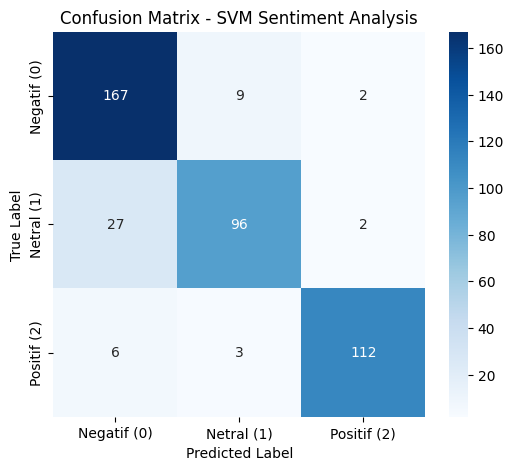

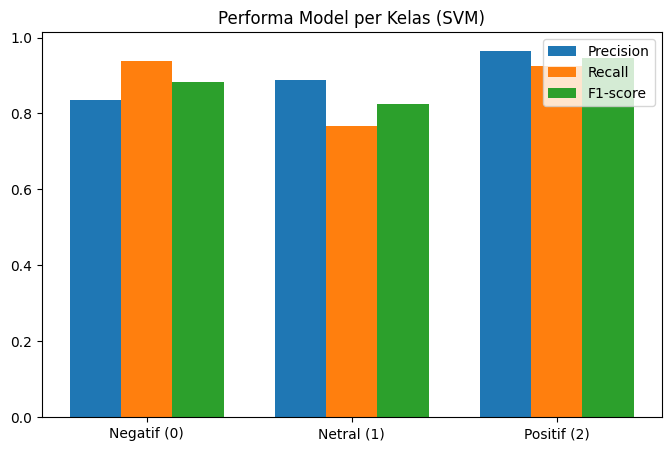

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix visual
cm = confusion_matrix(y_test, y_pred)
labels = ["Negatif (0)", "Netral (1)", "Positif (2)"]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - SVM Sentiment Analysis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ============================================================
# Visualisasi skor per kelas
# ============================================================
from sklearn.metrics import precision_recall_fscore_support

prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred)

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(8,5))
plt.bar(x - width, prec, width, label='Precision')
plt.bar(x, rec, width, label='Recall')
plt.bar(x + width, f1, width, label='F1-score')

plt.xticks(x, labels)
plt.title("Performa Model per Kelas (SVM)")
plt.legend()
plt.show()


In [8]:
# ============================================================
# 🔮 Fungsi Prediksi Sentimen (menggunakan model SVM terlatih)
# ============================================================

def predict_sentiment(texts):
    """
    Menerima 1 atau lebih teks review (list atau string),
    lalu mengembalikan hasil prediksi: 0=Negatif, 1=Netral, 2=Positif
    """
    if isinstance(texts, str):
        texts = [texts]  # ubah ke list jika hanya 1 teks
    
    # Preprocessing teks seperti data training
    clean_texts = [preprocess_text(t) for t in texts]
    
    # Ubah teks ke bentuk TF-IDF
    X_new = tfidf.transform(clean_texts)
    
    # Prediksi
    preds = svm_model.predict(X_new)
    
    # Mapping label
    label_map = {0: "Negatif 😠", 1: "Netral 😐", 2: "Positif 😊"}
    results = [label_map[p] for p in preds]
    
    return results

# ============================================================
# 🧪 Contoh Pengujian
# ============================================================

contoh_review = [
    "Wanginya lembut dan tahan lama banget, suka banget!",
    "Lumayan sih, tapi kurang tahan lama wanginya.",
    "Parfumnya bocor, isinya sedikit dan ga sesuai iklan!"
]

hasil_prediksi = predict_sentiment(contoh_review)

for teks, hasil in zip(contoh_review, hasil_prediksi):
    print(f"Review: {teks}\n→ Prediksi: {hasil}\n")


Review: Wanginya lembut dan tahan lama banget, suka banget!
→ Prediksi: Positif 😊

Review: Lumayan sih, tapi kurang tahan lama wanginya.
→ Prediksi: Netral 😐

Review: Parfumnya bocor, isinya sedikit dan ga sesuai iklan!
→ Prediksi: Negatif 😠



In [9]:
# ============================================================
# 💬 Versi Interaktif: Input Manual dari Pengguna
# ============================================================

while True:
    review = input("\nMasukkan teks review parfum (atau ketik 'exit' untuk keluar): ")
    if review.lower() == "exit":
        print("Terima kasih, prediksi selesai 😊")
        break
    
    hasil = predict_sentiment(review)[0]
    print(f"→ Prediksi Sentimen: {hasil}")


→ Prediksi Sentimen: Positif 😊
→ Prediksi Sentimen: Negatif 😠
→ Prediksi Sentimen: Netral 😐
→ Prediksi Sentimen: Negatif 😠
→ Prediksi Sentimen: Negatif 😠


KeyboardInterrupt: Interrupted by user